In [22]:
!pip install mesa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import mesa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from mesa.visualization.modules import CanvasGrid, ChartModule, TextElement, TextElement
from mesa.visualization.ModularVisualization import ModularServer
from mesa.datacollection import DataCollector


Used the Previous Assignments Code Here



In [25]:
class Boid(mesa.Agent):
    """
    A Boid-style flocker agent.

    The agent follows three behaviors to flock:
        - Cohesion: steering towards neighboring agents.
        - Separation: avoiding getting too close to any other agent.
        - Alignment: try to fly in the same direction as the neighbors.

    Boids have a vision that defines the radius in which they look for their
    neighbors to flock with. Their speed (a scalar) and velocity (a vector)
    define their movement. Separation is their desired minimum distance from
    any other Boid.
    """

    def __init__(
        self,
        unique_id,
        model,
        pos,
        speed,
        velocity,
        vision,
        separation,
        cohere=0.025,
        separate=0.25,
        match=0.04,
        color = 1,
        steps_as_red = 0,
        steps_as_green = 0,
        Immuninty_status = False,
        Covid_Status = True,
        masked = False,
        quarantine_Status = True,
        fatality_rate = False,
        fatality_rate_counter = 0,
        trace = False
        
    ):
        """
        Create a new Boid flocker agent.

        Args:
            unique_id: Unique agent identifyer.
            pos: Starting position
            speed: Distance to move per step.
            heading: numpy vector for the Boid's direction of movement.
            vision: Radius to look around for nearby Boids.
            separation: Minimum distance to maintain from other Boids.
            cohere: the relative importance of matching neighbors' positions
            separate: the relative importance of avoiding close neighbors
            match: the relative importance of matching neighbors' headings
        """
        super().__init__(unique_id, model)
        self.pos = np.array(pos)
        self.speed = speed
        self.velocity = velocity
        self.vision = vision
        self.separation = separation
        self.cohere_factor = cohere
        self.separate_factor = separate
        self.match_factor = match
        self.color = color
        self.steps_as_red = steps_as_red
        self.steps_as_green = steps_as_green
        self.Immuninty_status  = Immuninty_status
        self.Covid_Status = Covid_Status
        self.masked = masked
        self.quarantine_Status = quarantine_Status
        self.fatality_rate = fatality_rate
        self.trace = trace 
    
    def trace(self):
        return self.trace()
    
    def fatality_rate(self):
        return self.fatality_rate
    
    def quarantine_Status(self):
        return self.quarantine_Status
    
    def masked(self):
        return self.mask_effect

        
    def Covid_Status(self):
        return self.Covid_Status
    
    def Immuninty_status(self):
        return self.Immuninty_status

    def steps_as_green(self):
        return self.steps_as_green
        
        
    def steps_as_red(self):
        return self.steps_as_red


    def color(self):
        return self.color

        
    def cohere(self, neighbors):
        """
        Return the vector toward the center of mass of the local neighbors.
        """
        cohere = np.zeros(2)
        if neighbors:
            for neighbor in neighbors:
                cohere += self.model.space.get_heading(self.pos, neighbor.pos)
            cohere /= len(neighbors)
        return cohere

    def separate(self, neighbors):
        """
        Return a vector away from any neighbors closer than separation dist.
        """
        me = self.pos
        them = (n.pos for n in neighbors)
        separation_vector = np.zeros(2)
        for other in them:
            if self.model.space.get_distance(me, other) < self.separation:
                separation_vector -= self.model.space.get_heading(me, other)
        return separation_vector

    def match_heading(self, neighbors):
        """
        Return a vector of the neighbors' average heading.
        """
        match_vector = np.zeros(2)
        if neighbors:
            for neighbor in neighbors:
                match_vector += neighbor.velocity
            match_vector /= len(neighbors)
        return match_vector

    def step(self):
        """
        Get the Boid's neighbors, compute the new vector, and move accordingly.
        """

        neighbors = self.model.space.get_neighbors(self.pos, self.vision, False)
     
        
        if self.color == 2 : 
            
            if self.Immuninty_status == True and self.masked == False and self.quarantine_Status == False:
                nearby_boids = self.model.space.get_neighbors(self.pos, random.randint(2, 4), False)
                for boid in nearby_boids:
                    if boid.color == 1:
                        boid.color = 2
                        self.Immuninty_status == False
                        self.Covid_Status = True
                        
            elif self.masked == True and self.Immuninty_status == False and self.quarantine_Status == False:
                nearby_boids = self.model.space.get_neighbors(self.pos, random.randint(1, 2), False)
                for boid in nearby_boids:
                    if boid.color == 1:
                        boid.color = 2
                        self.masked = False
                        self.Covid_Status = True
                        
            elif self.Covid_Status == True and self.Immuninty_status == False and self.masked == False and self.quarantine_Status == False:
               boid.color = 6
               
            
            else :
                nearby_boids = self.model.space.get_neighbors(self.pos,random.randint(1, 3), False)
                for boid in nearby_boids:
                    if boid.color == 1:
                        boid.color = 2
                        self.Covid_Status = True
            
            
        if self.color == 2:
            self.steps_as_red += 1
            self.Covid_Status == True
                
        if self.trace == True:
            nearby_boids = self.model.space.get_neighbors(self.pos, random.randint(2, 4), False)
            for boid in nearby_boids:
                if boid.color == 2:
                    self.Covid_Status = True
                    self.quarantine_Status = True
                    boid.color = 1
            
    
            
        if self.steps_as_red == 60 and self.color == 2:
            self.color = 3
            self.Immuninty_status == False
        
        if self.color == 3:
            self.steps_as_green += 1
         
            
        if self.steps_as_green == 10 and self.color == 3 and self.Immuninty_status == False:
            self.color = 4
            
      
        self.velocity += (
            
            self.cohere(neighbors) * self.cohere_factor
            + self.separate(neighbors) * self.separate_factor
            + self.match_heading(neighbors) * self.match_factor
        ) / 2
        self.velocity /= np.linalg.norm(self.velocity)
        new_pos = self.pos + self.velocity * self.speed
        self.model.space.move_agent(self, new_pos)



class BoidFlockers(mesa.Model):
    """
    Flocker model class. Handles agent creation, placement and scheduling.
    """
    
    population=100,
    Vaccined_boids = 0,
    mask_effect = 0,
    quarantined_boids = 0,
    speed=1,
    Contact_tracing = False,
    Immunine_rate  = 0,
    width=100,
    height=100,
    vision=10,
    separation=2,
    cohere=0.025,
    separate=0.25,
    match=0.04,
    red_boids= 0,
    green_boids = 0,
    
    

    def __init__(
        self,
        population=100,
        Vaccined_boids = 0,
        mask_effect = 0,
        quarantined_boids = 0,
        speed=1,
        Contact_tracing = False,
        Immunine_rate  = 0,
        width=100,
        height=100,
        vision=10,
        separation=2,
        cohere=0.025,
        separate=0.25,
        match=0.04,
        red_boids= 0,
        green_boids = 0,
       
    ):
        """
        Create a new Flockers model.

        Args:
            population: Number of Boids
            width, height: Size of the space.
            speed: How fast should the Boids move.
            vision: How far around should each Boid look for its neighbors
            separation: What's the minimum distance each Boid will attempt to
                    keep from any other
            cohere, separate, match: factors for the relative importance of
                    the three drives."""
        self.population = population
        self.Vaccined_boids = Vaccined_boids
        self.mask_effect = mask_effect
        self.quarantined_boids = quarantined_boids 
        self.speed = speed
        self.Contact_tracing = Contact_tracing,
        self.Immunine_rate  = Immunine_rate 
        self.vision = vision
        self.separation = separation
        self.schedule = mesa.time.RandomActivation(self)
        self.space = mesa.space.ContinuousSpace(width, height, True)
        self.factors = dict(cohere=cohere, separate=separate, match=match)
        self.make_agents()
        self.running = True,
        self.red_boids = red_boids,
        self.green_boids = green_boids
        
        self.datacollector = DataCollector(
         {
             "Positive_Boids": lambda m: m.count_boids_by_color(2),
             "Negative_Boids": lambda m: m.count_boids_by_color(3),
             "Immunized_Boids" : lambda m: m.count_boids_by_color(4),
             "Un-Effected Boids": lambda m: m.count_boids_by_color(1),
             "Fatality Rate":lambda m : m.count_boids_by_color(3)/2
         }
             )
 

        self.color_chart = ChartModule(
         [{"Label": "Positive_Boids", "Color": "red"}, {"Label": "Negative_Boids", "Color": "green"}, 
          {"Label": "Immunized_Boids", "Color": "#00ffe5"}
          ,{"Label": "Un-Effected Boids", "Color": "#ffb300"},
          {"Label": "Fatality Rate", "Color": "#fa8899"}],
         data_collector_name="datacollector",
         canvas_height=250,
         canvas_width=700,
         )
    
    def count_boids_by_fatality(self):
        """Count the number of boids of a given color"""
        return len([boid for boid in self.schedule.agents if boid.color == 3])//3

        
    def count_boids_by_color(self, color):
        """Count the number of boids of a given color"""
        return len([boid for boid in self.schedule.agents if boid.color == color])


    def make_agents(self):
        """
        Create self.population agents, with random positions and starting headings.
    
        """
        print("Population : ", self.population)
        x = self.random.random() * self.space.x_max
        y = self.random.random() * self.space.y_max
        pos = np.array((x, y))
        velocity = np.random.random(2) * 2 - 1
        boid = Boid(self.population,self, pos,  self.speed, velocity, self.vision,self.separation, **self.factors)
        boid.color = 2
        self.space.place_agent(boid, pos)
        self.schedule.add(boid)
            
    
        counter_immunized = (self.Vaccined_boids / 100) * (self.population)
        
        counter_immunized = int(counter_immunized/2)
        
        
        mask_counter = (self.mask_effect / 100) * (self.population)
        
        mask_counter = int(mask_counter)
        
        
        counter_quarantined = (self.Vaccined_boids/100) * (self.population)
        
        counter_quarantined = int(counter_quarantined)
        
        tracing = random.randint(0,4)
    
 
        print("Counter Vaccine ",counter_immunized)
        print("Vaccine ",self.Vaccined_boids)
        print("Mask_Effect ", self.mask_effect)
        
        
        for i in range(self.population-1):
            x = self.random.random() * self.space.x_max
            y = self.random.random() * self.space.y_max
            pos = np.array((x, y))
            velocity = np.random.random(2) * 2 - 1
            boid = Boid( i,self, pos,  self.speed, velocity, self.vision,self.separation, **self.factors)
            
            if counter_immunized != 0:
                boid.Immuninty_status = True
                boid.color = 4
                counter_immunized -= 1
                
                
            if mask_counter != 0 and boid.Immuninty_status != False :
                boid.mask_effect = True 
                mask_counter -= 1
                
            if counter_quarantined != 0 and boid.Immuninty_status != False and boid.mask_effect == False :
                boid.quarantine_Status = True
                counter_quarantined -= 1
            
            if self.Contact_tracing == True and  tracing > 0 :
                boid.trace = True
                tracing -= 1
                
                 
            self.space.place_agent(boid, pos)
            self.schedule.add(boid)
        
        
    
    
    def step(self):
       self.datacollector.collect(self)
       self.schedule.step()
       
      

  
       


In [101]:
def draw_boids(model):
    xb_vals =[]; yb_vals = []
    xr_vals =[]; yr_vals = []
    xg_vals =[]; yg_vals = []
    xf_vals =[]; yf_vals = [] 
  
    for boid in model.schedule.agents:
        if (boid.color == 1):
            x, y = boid.pos
            xb_vals.append(x)
            yb_vals.append(y)   
        elif (boid.color == 2):
            x, y = boid.pos
            xr_vals.append(x)
            yr_vals.append(y)   
        elif (boid.color == 3):
            x, y = boid.pos
            xg_vals.append(x)
            yg_vals.append(y)
        elif(boid.color == 4):
            x,y = boid.pos
            xf_vals.append(x)
            yf_vals.append(y)
           
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111)
    ax.scatter(xr_vals, yr_vals, c= '#ffb300')
    ax.scatter(xb_vals, yb_vals, c= 'Red')
    ax.scatter(xg_vals, yg_vals, c= 'Green')
    ax.scatter(xg_vals, yg_vals, c= '#00ffe5')

Population :  200
Counter Vaccine  50
Vaccine  50
Mask_Effect  50


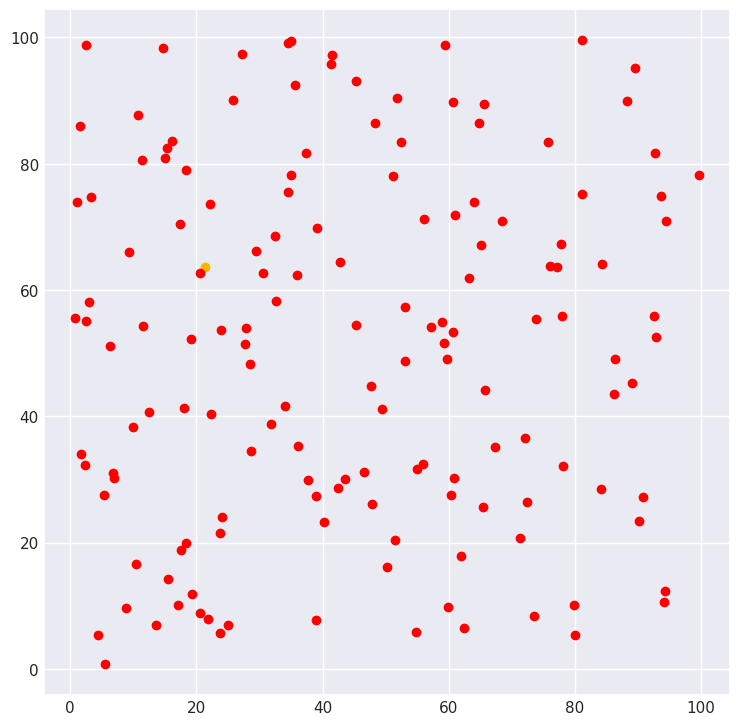

In [102]:
model = BoidFlockers(200, 50,50, 1,5,1)
draw_boids(model)

Using Batch Run Function

Population :  100
Counter Vaccine  25
Vaccine  50
Mask_Effect  50


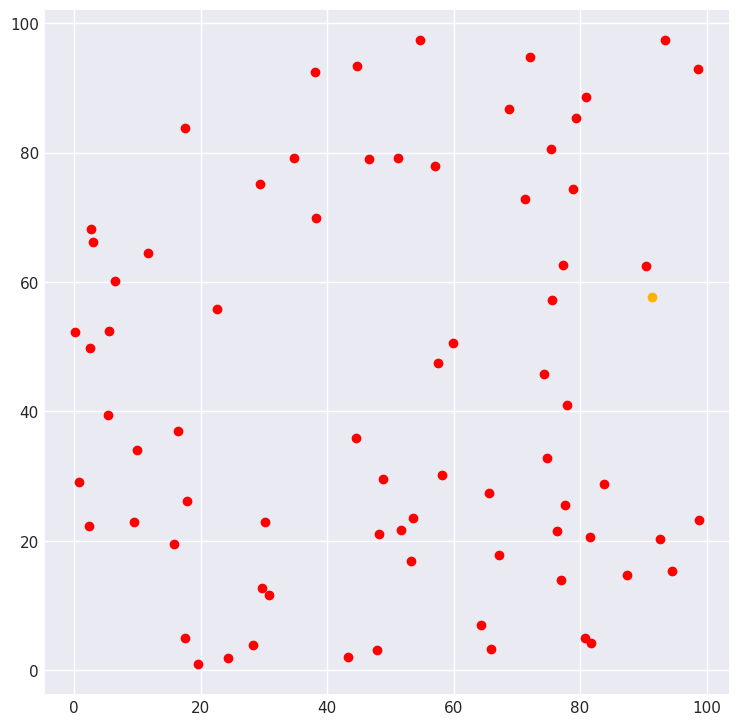

In [103]:
model = BoidFlockers(100, 50,50, 1,5,1)
draw_boids(model)

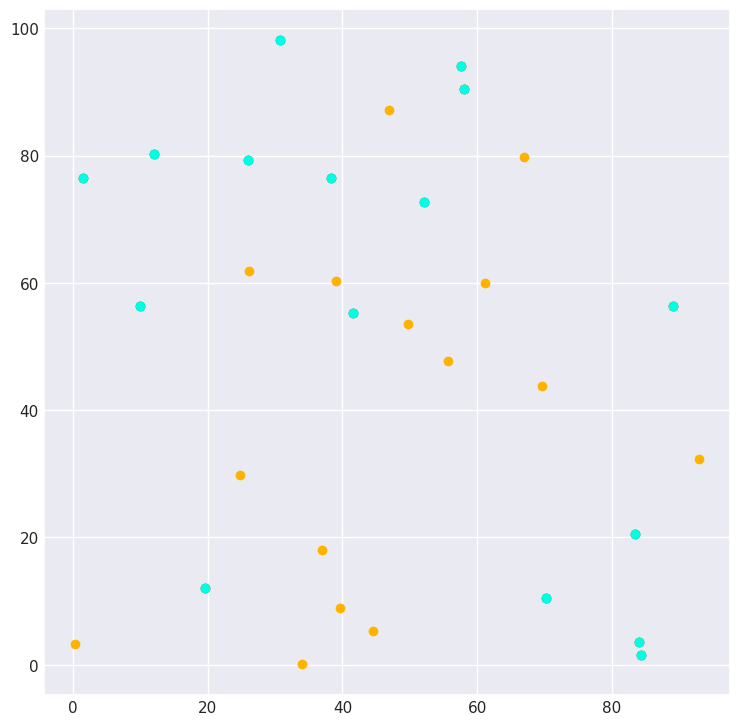

In [105]:
for i in range(70):
    model.step()
draw_boids(model)

In [ ]:
#@title Default title text
results = mesa.batch_run(
    BoidFlockers, 
    parameters= {"width": 50, "height": 50, "speed": np.arange(1.0, 5.2, 0.2)},
    iterations= 10, 
    max_steps= 100,
    number_processes=1, 
    data_collection_period=1, 
    display_progress=True, 
) 

resultsDataframe = pd.DataFrame(results)
resultsDataframe.head(20)

Storing acquired data

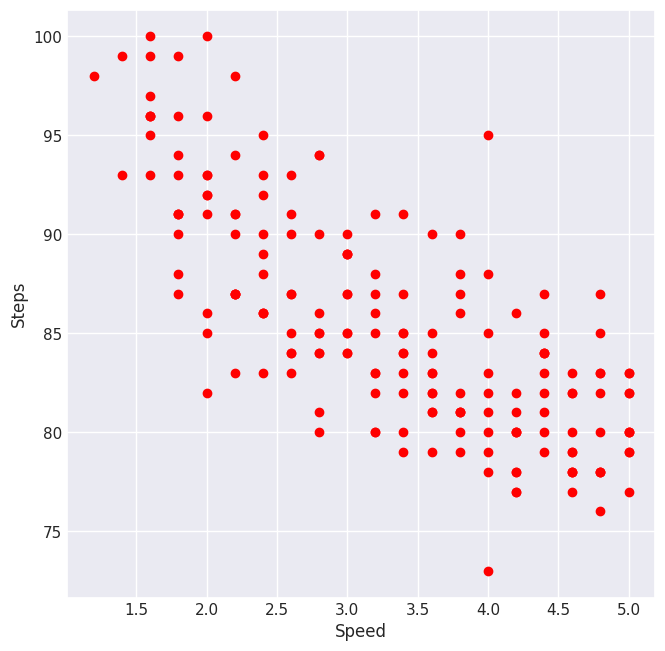

<Axes: title={'center': 'Step'}, xlabel='speed'>

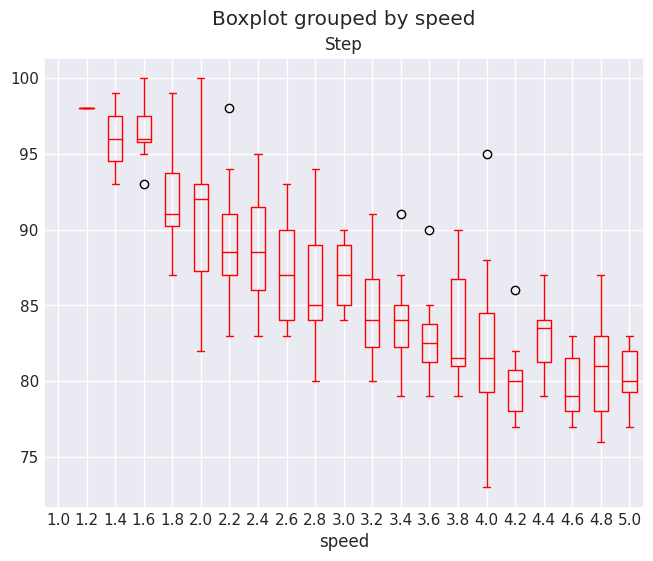

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = []

for i in range(len(results)):
    row = results[i]
    speed = round(row["speed"], 1)
    filldata = np.nan
    for j in range(150):
        Red = row["Positive_Boids"]
        if i !=0:
            prev =  results[i-1]
        if Red == 0 and prev["Positive_Boids"] > 0:
            filldata = row["Step"]
            break
    data.append({"speed": speed, "Step": filldata})


scatterPlot = [d["speed"] for d in data]
steps = [d["Step"] for d in data]
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(scatterPlot , steps, color='red')
ax.set_ylabel("Steps")
ax.set_xlabel("Speed")
plt.show()


result_BP = pd.DataFrame(data)
result_BP.boxplot(column= "Step", by="speed", figsize=(7.5,6), color='red')


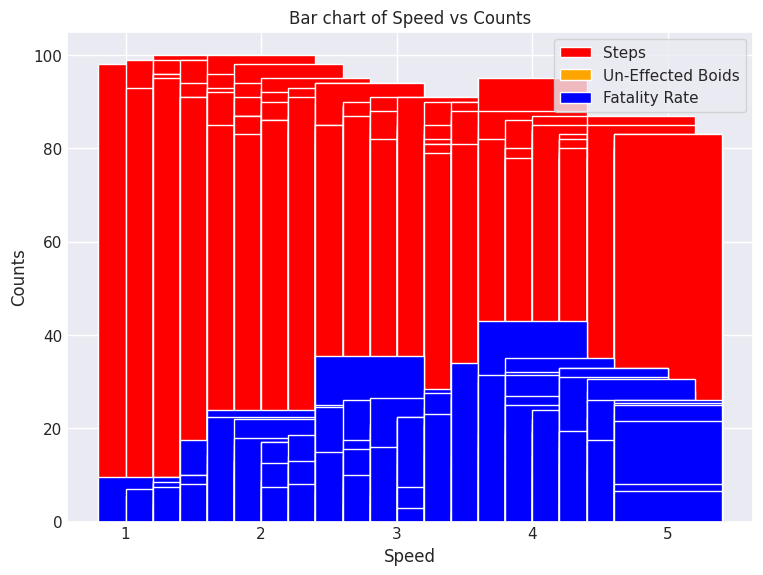

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create the data
data = []
for i in range(len(results)):
    row = results[i]
    speed = round(row["speed"], 1)
    filldata = np.nan
    for j in range(150):
        Red = row["Positive_Boids"]
        if i !=0:
            prev =  results[i-1]
        if Red == 0 and prev["Positive_Boids"] > 0:
            filldata = row["Step"]
            break
    data.append({"speed": speed, "Step": filldata, "Un-Effected Boids": row["Un-Effected Boids"], "Fatality Rate": row["Fatality Rate"]})

# Remove NaN values from the data
data = [d for d in data if not np.isnan(d["speed"]) and not np.isnan(d["Step"])]

# Sort the data based on speed
data.sort(key=lambda d: d["speed"])

# Create the bar chart with multiple bars
x = [d["speed"] for d in data]
y1 = [d["Step"] for d in data]
y2 = [d["Un-Effected Boids"] for d in data]
y3 = [d["Fatality Rate"] for d in data]
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x, y1, color='red', label='Steps')
ax.bar(x, y2, color='orange', label='Un-Effected Boids')
ax.bar(x, y3, color='blue', label='Fatality Rate')
ax.set_xlabel('Speed')
ax.set_ylabel('Counts')
ax.set_title('Bar chart of Speed vs Counts')
ax.legend()

plt.show()


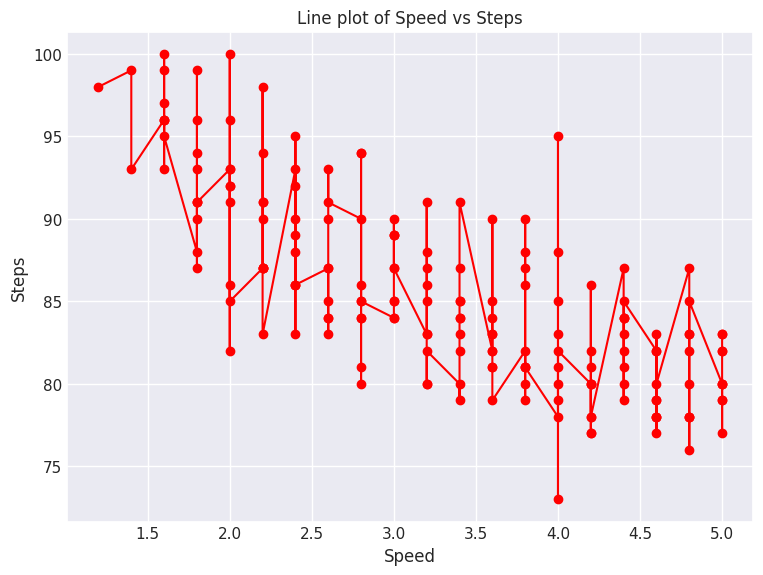

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create the data
data = []
for i in range(len(results)):
    row = results[i]
    speed = round(row["speed"], 1)
    filldata = np.nan
    for j in range(150):
        Red = row["Positive_Boids"]
        if i !=0:
            prev =  results[i-1]
        if Red == 0 and prev["Positive_Boids"] > 0:
            filldata = row["Step"]
            break
            
    data.append({"speed": speed, "Step": filldata})

# Remove NaN values from the data
data = [d for d in data if not np.isnan(d["speed"]) and not np.isnan(d["Step"])]

# Sort the data based on speed
data.sort(key=lambda d: d["speed"])

# Create the line plot
x = [d["speed"] for d in data]
y = [d["Step"] for d in data]
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x, y, marker='o', color='red')
ax.set_xlabel('Speed')
ax.set_ylabel('Steps')
ax.set_title('Line plot of Speed vs Steps')

plt.show()


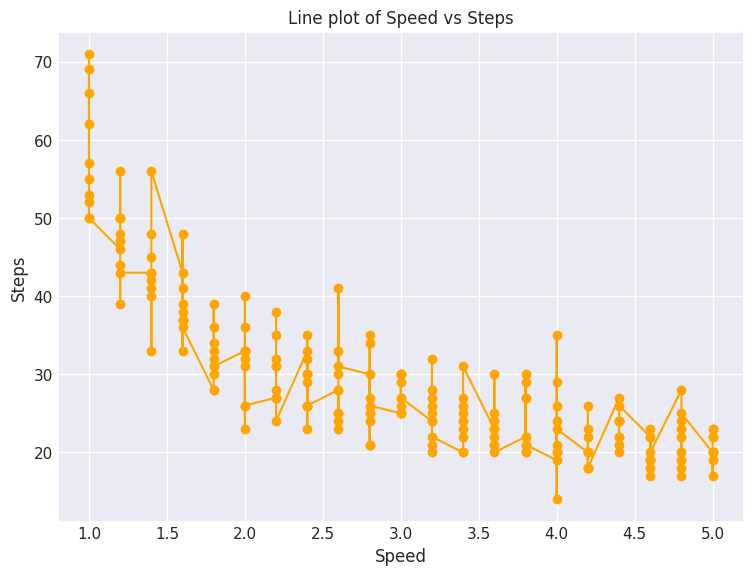

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create the data
data = []
for i in range(len(results)):
    row = results[i]
    speed = round(row["speed"], 1)
    filldata = np.nan
    for j in range(150):
        Red = row["Un-Effected Boids"]
        if i !=0:
            prev =  results[i-1]
        if Red == 0 and prev["Un-Effected Boids"] > 0:
            filldata = row["Step"]
            break
    data.append({"speed": speed, "Step": filldata})

# Remove NaN values from the data
data = [d for d in data if not np.isnan(d["speed"]) and not np.isnan(d["Step"])]

# Sort the data based on speed
data.sort(key=lambda d: d["speed"])

# Create the line plot
x = [d["speed"] for d in data]
y = [d["Step"] for d in data]
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x, y, marker='o', color='orange')
ax.set_xlabel('Speed')
ax.set_ylabel('Steps')
ax.set_title('Line plot of Speed vs Steps')

plt.show()


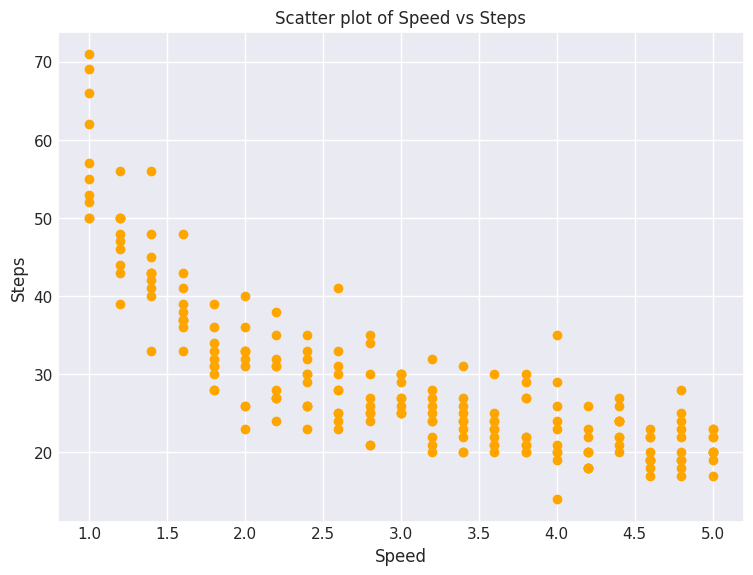

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create the data
data = []
for i in range(len(results)):
    row = results[i]
    speed = round(row["speed"], 1)
    filldata = np.nan
    for j in range(150):
        Red = row["Un-Effected Boids"]
        if i !=0:
            prev =  results[i-1]
        if Red == 0 and prev["Un-Effected Boids"] > 0:
            filldata = row["Step"]
            break
    data.append({"speed": speed, "Step": filldata})

# Remove NaN values from the data
data = [d for d in data if not np.isnan(d["speed"]) and not np.isnan(d["Step"])]

# Sort the data based on speed
data.sort(key=lambda d: d["speed"])

# Create the scatter plot
x = [d["speed"] for d in data]
y = [d["Step"] for d in data]
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x, y, marker='o', color='orange')
ax.set_xlabel('Speed')
ax.set_ylabel('Steps')
ax.set_title('Scatter plot of Speed vs Steps')

plt.show()
